# Attrition Insights : A Data-Driven Approach to Employee Retention

## BUSINESS UNDERSTANDING

Employee attrition is a pervasive issue in the HR industry, resulting in significant costs, loss of talent, and decreased productivity. The lack of understanding of the underlying factors contributing to employee turnover hinders organizations from developing effective retention strategies.


#### Business Goal:

The primary objective of this project is to develop a data-driven approach to identify the key drivers of employee attrition and provide actionable insights to improve employee retention


#### Datasets
The dataset was gotten from a source link (KAGGLE)
link is found here: https://www.kaggle.com/datasets/itssuru/hr-employee-attrition


#### Analytical Questions:

- How does employee attrition vary across different departments
- What is the attrition rate compared to retention, and what percentage of employees leave versus those who remain with the company?
- Do married employees who frequently travel for business have a higher likelihood of attrition, and how does marital status and travel frequency impact turnover?
- Which department experiences the highest attrition rate ?
- How is the employee distribution across different job roles ?


#### Hypothetical Question

- Do younger or older employees tend to leave the company more frequently?
- Are male or female employees leaving at a higher rate?
- Do married employees tend to travel frequently?



## DATA UNDERSTANDING

In [77]:
# impoort packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import ttest_ind
from sklearn.feature_selection import chi2
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

In [78]:
# Loading our dataset
Attrition_df =pd.read_csv('../Dataset/HR-Employee-Attrition.csv')

In [79]:
# retrieving the first 5 rows
Attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## EXPLORATORY DATA ANALYSIS

In [80]:
# size of the dataframe
Attrition_df.shape

(1470, 35)

In [81]:
Attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [82]:
# Checking for missing values
Attrition_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [83]:
# checking for duplicates
Attrition_df.duplicated().sum()

np.int64(0)

In [84]:
for column in Attrition_df:
        print(f"Column Name : {column}")
        print(Attrition_df[column].unique())
        print("-----------------------------")

Column Name : Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
-----------------------------
Column Name : Attrition
['Yes' 'No']
-----------------------------
Column Name : BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-----------------------------
Column Name : DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684 

In [85]:
# Description statistics
Attrition_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


## KEY INSIGHTS AND OBSERVATIONS

- The average employee age is 36, with the youngest being 18 and the oldest 60.
- Employees, on average, live 9 km from the office, with the farthest commute being 29 km and the shortest distance 1 km.
- The average hourly wage among employees is $65.
- Our longest-tenured employee has 40 years of service, while the most recent hire has been with the company for just one year.
- The Research and Development department has the largest number of employees.
- A majority of our staff members report traveling infrequently for work.
- Sales Executives constitute the largest portion of our workforce.
- Most employees are married.
- The dataset contains no missing values or duplicates, ensuring data integrity and accuracy.


## UNIVARIATE ANALYSIS

In [86]:

#retrieving columns with numerical data types
num_cols=Attrition_df.select_dtypes(include='number')
num_cols.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [87]:
#retrieving columns with object data types
cat_cols=Attrition_df.select_dtypes(include='object')
cat_cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

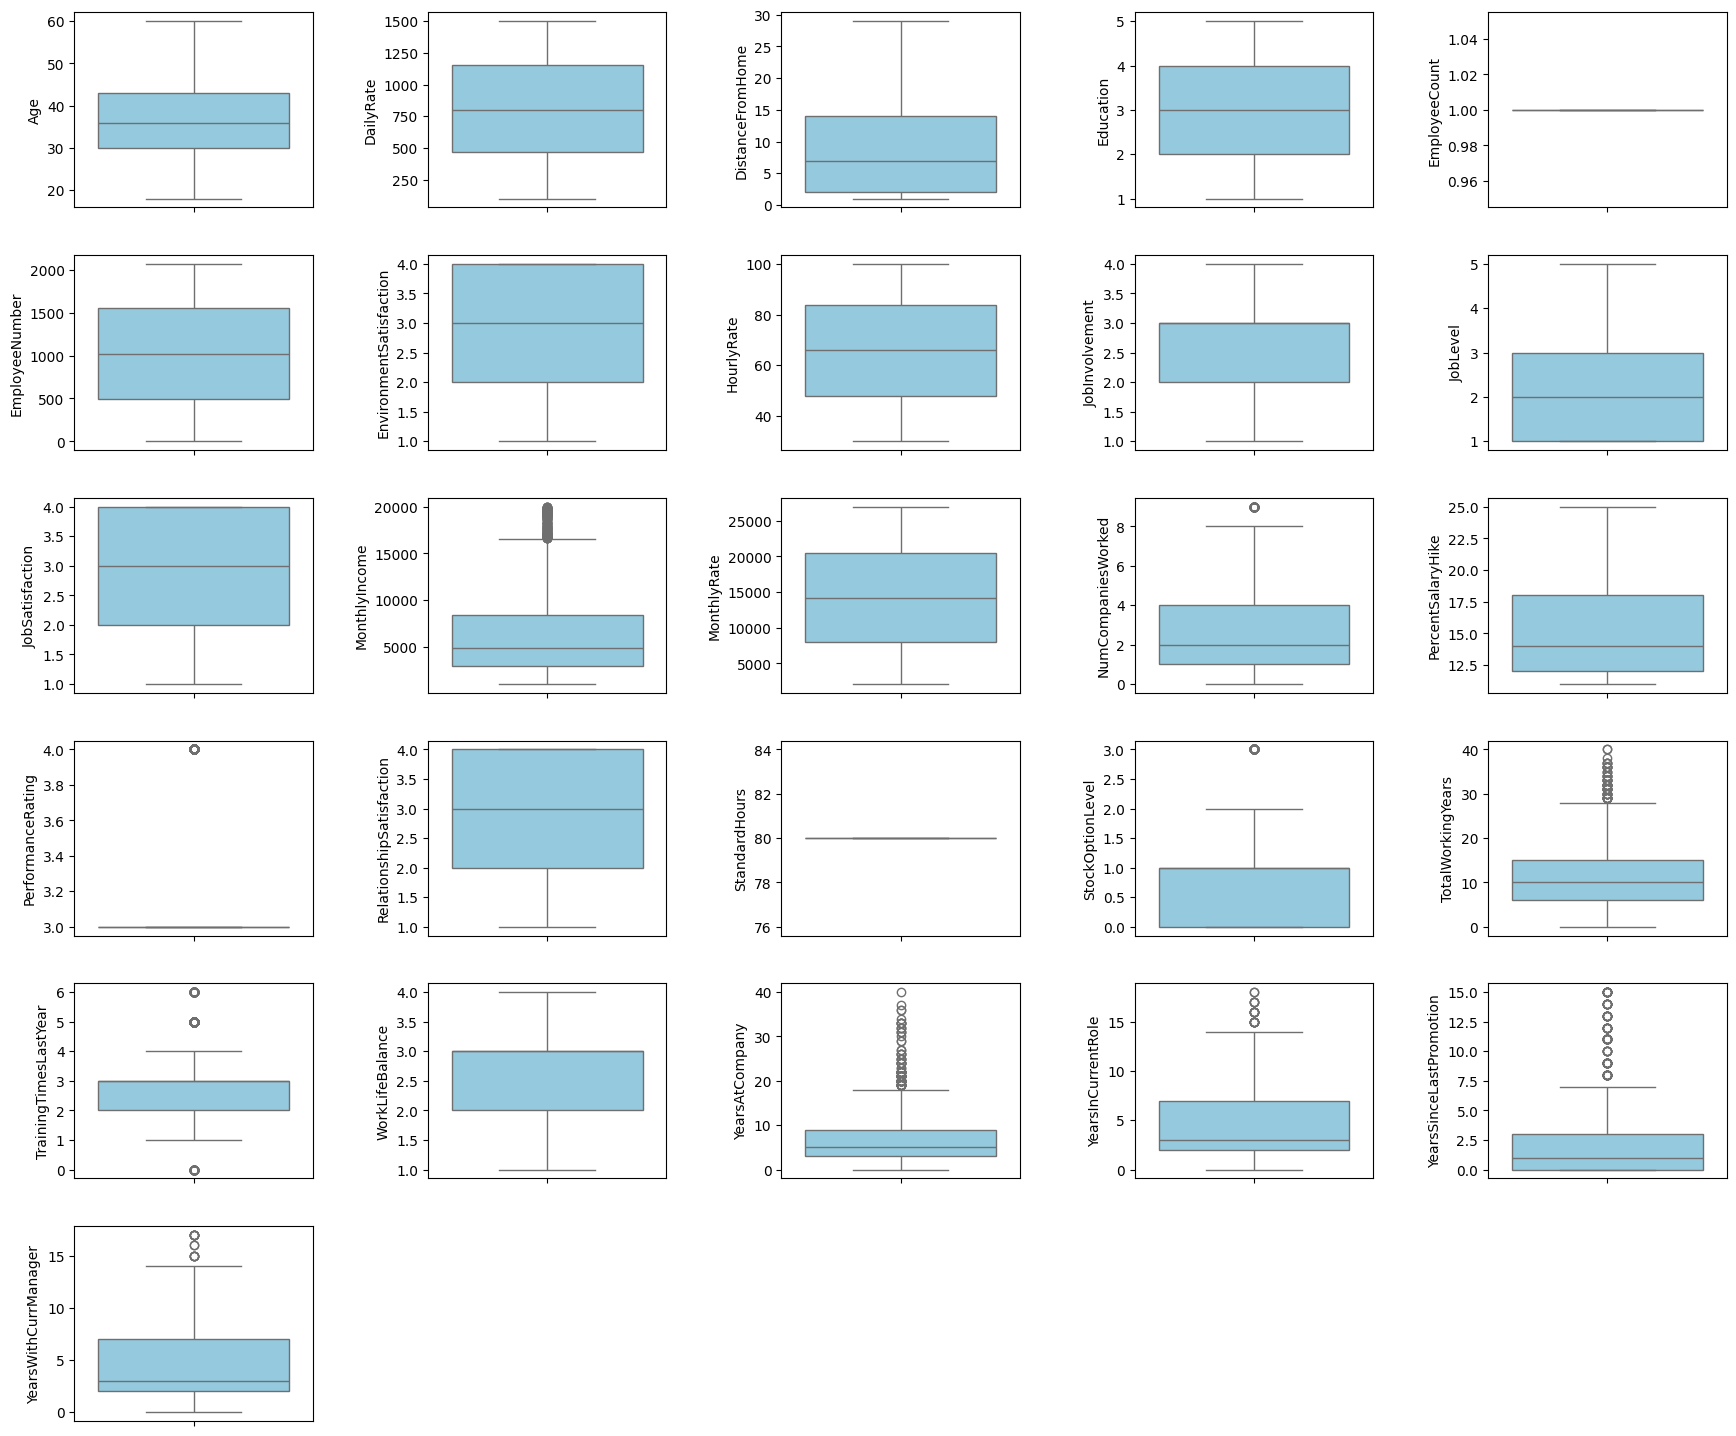

In [88]:

# plotting box plot for numerical data
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.boxplot(Attrition_df, y=Attrition_df[variable], color='skyblue')
    plt.tight_layout(pad=3),
    plt.xticks(rotation=45)
plt.show()

/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_71473/2900464129.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(Attrition_df,x=Attrition_df[variable],label= 'skewness: %.2f'%(Attrition_df[variable].skew()), fill = True,color= 'skyblue')
/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_71473/2900464129.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')
/var/folders/tk/fdypsrw94kg40x6m2x674k_m0000gn/T/ipykernel_71473/2900464129.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(Attrition_df,x=Attrition_df[variable],label= 'skewness: %.2f'%(Attrition_df[variable].skew()), fill = True,color= 'skyblue')
/var/folders/tk/fdypsrw94kg40x6m2x674k_m

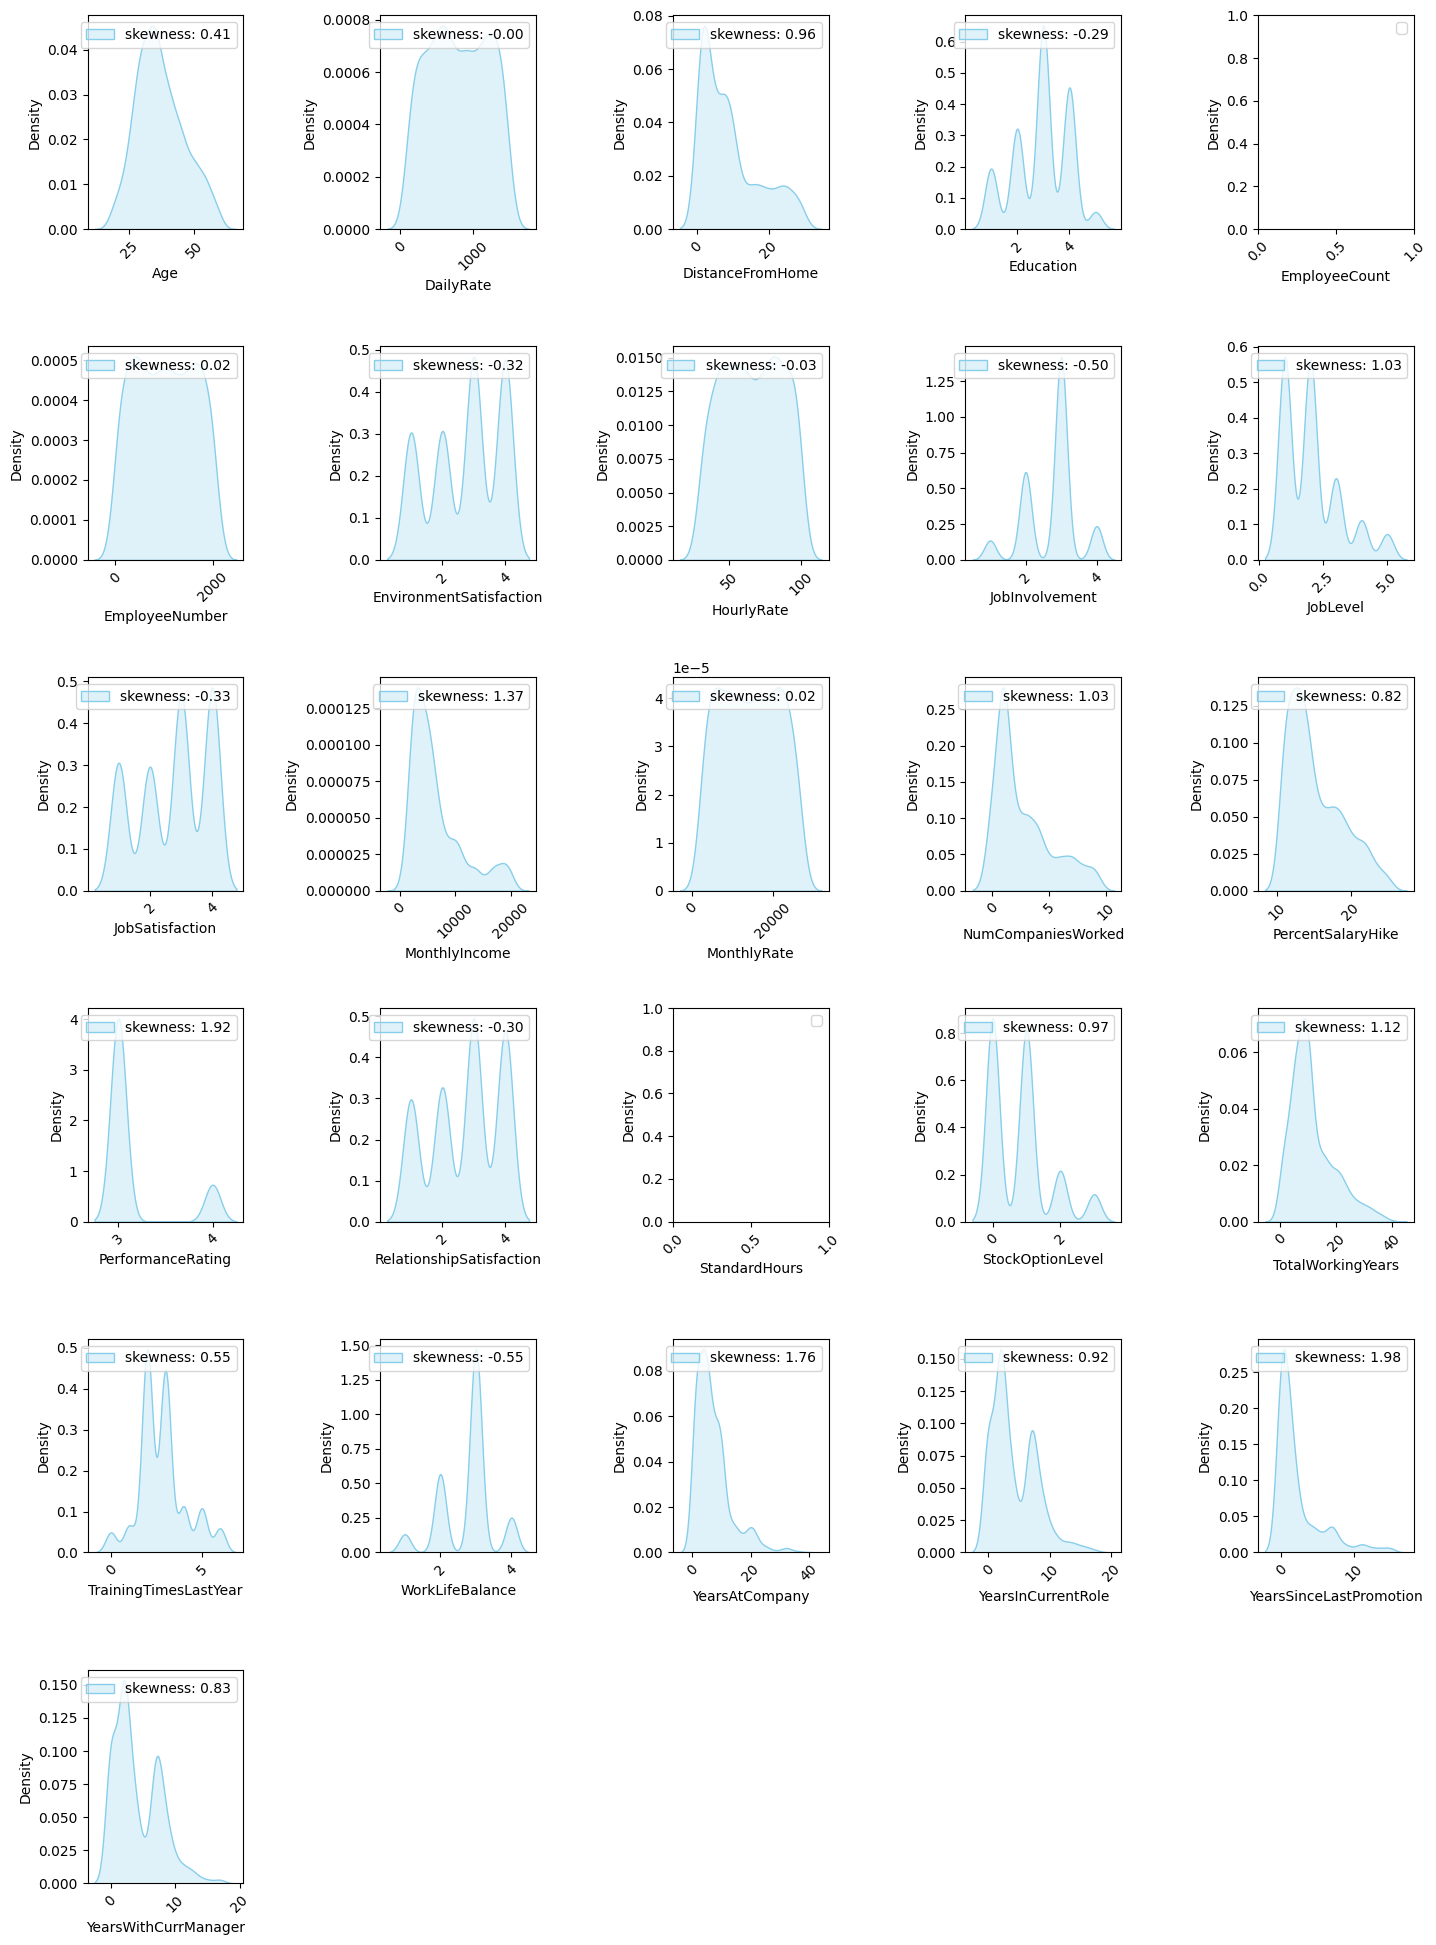

In [89]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.kdeplot(Attrition_df,x=Attrition_df[variable],label= 'skewness: %.2f'%(Attrition_df[variable].skew()), fill = True,color= 'skyblue')
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

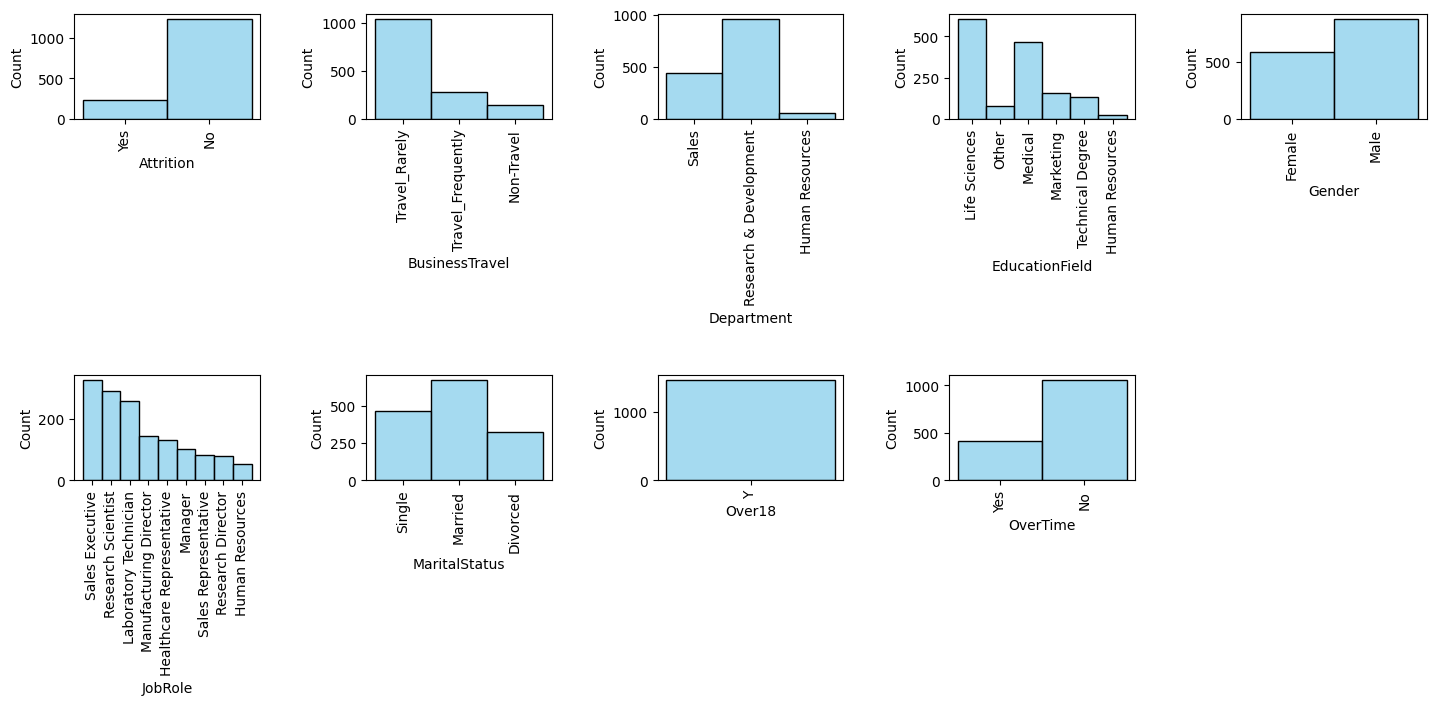

In [90]:
# Plot a Bar chart plot for the variables
plt.figure(figsize=(15, 20))

for i, variable in enumerate(cat_cols):
    plt.subplot(6,5, i + 1)
    sns.histplot(cat_cols,x=cat_cols[variable], color= 'skyblue')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

## OBSERVATION

- The majority of our workforce remains with the company, with a lower attrition rate compared to those who have left.
- A significant portion of our employees rarely engage in business travel.
- Our workforce is predominantly male, with a smaller representation of female employees.
- Analysis shows that variables such as age, monthly income, number of companies worked, years at the company, and distance from home exhibit positive skewness.
- Outliers have been identified in the variables of monthly income, years at the company, total working years, number of companies

##  BIVARIATE & MULTIVARIATE ANALYSIS 

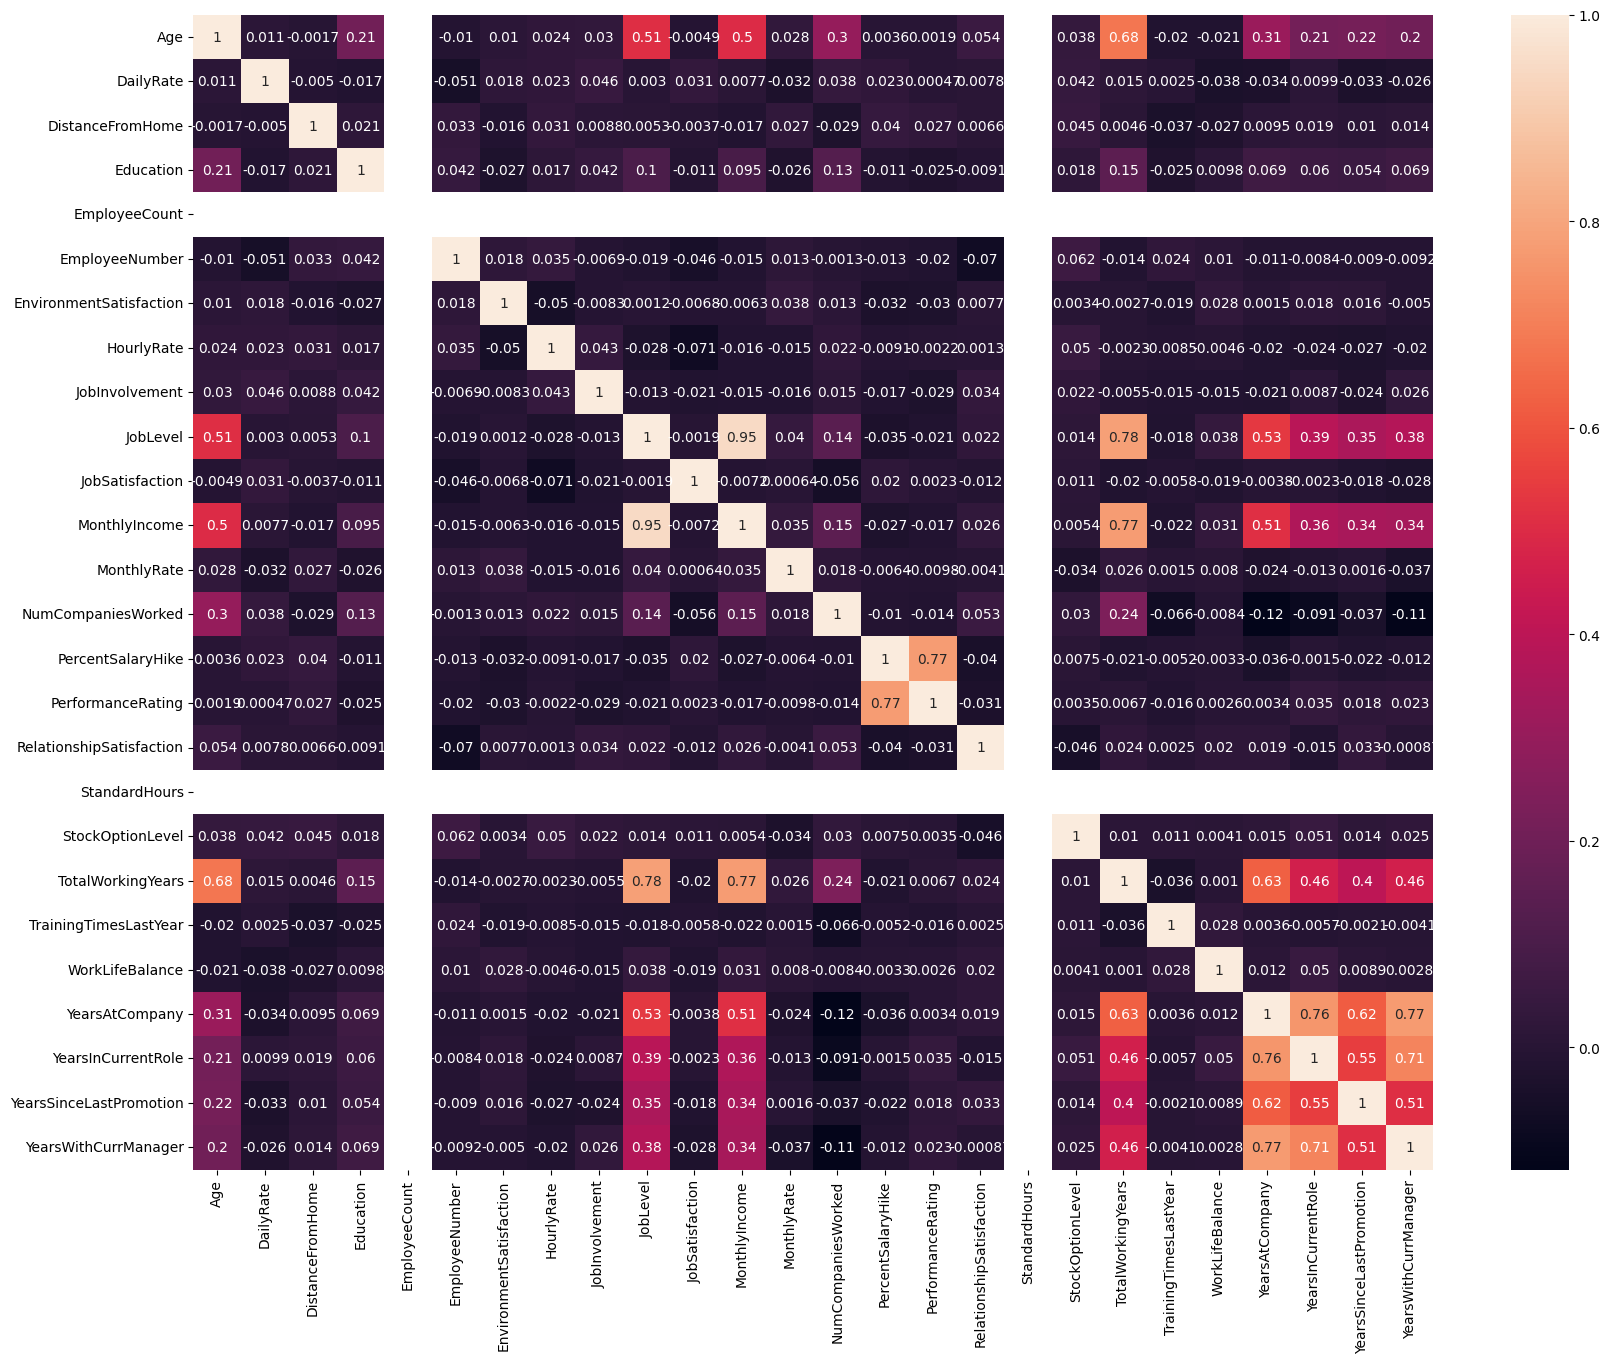

In [91]:

# plotting heatmap for correlatiuon between each variable
plt.figure(figsize=(20, 15))
sns.heatmap(data=num_cols.corr(), annot=True, color=['skyblue','brown'])
plt.show()


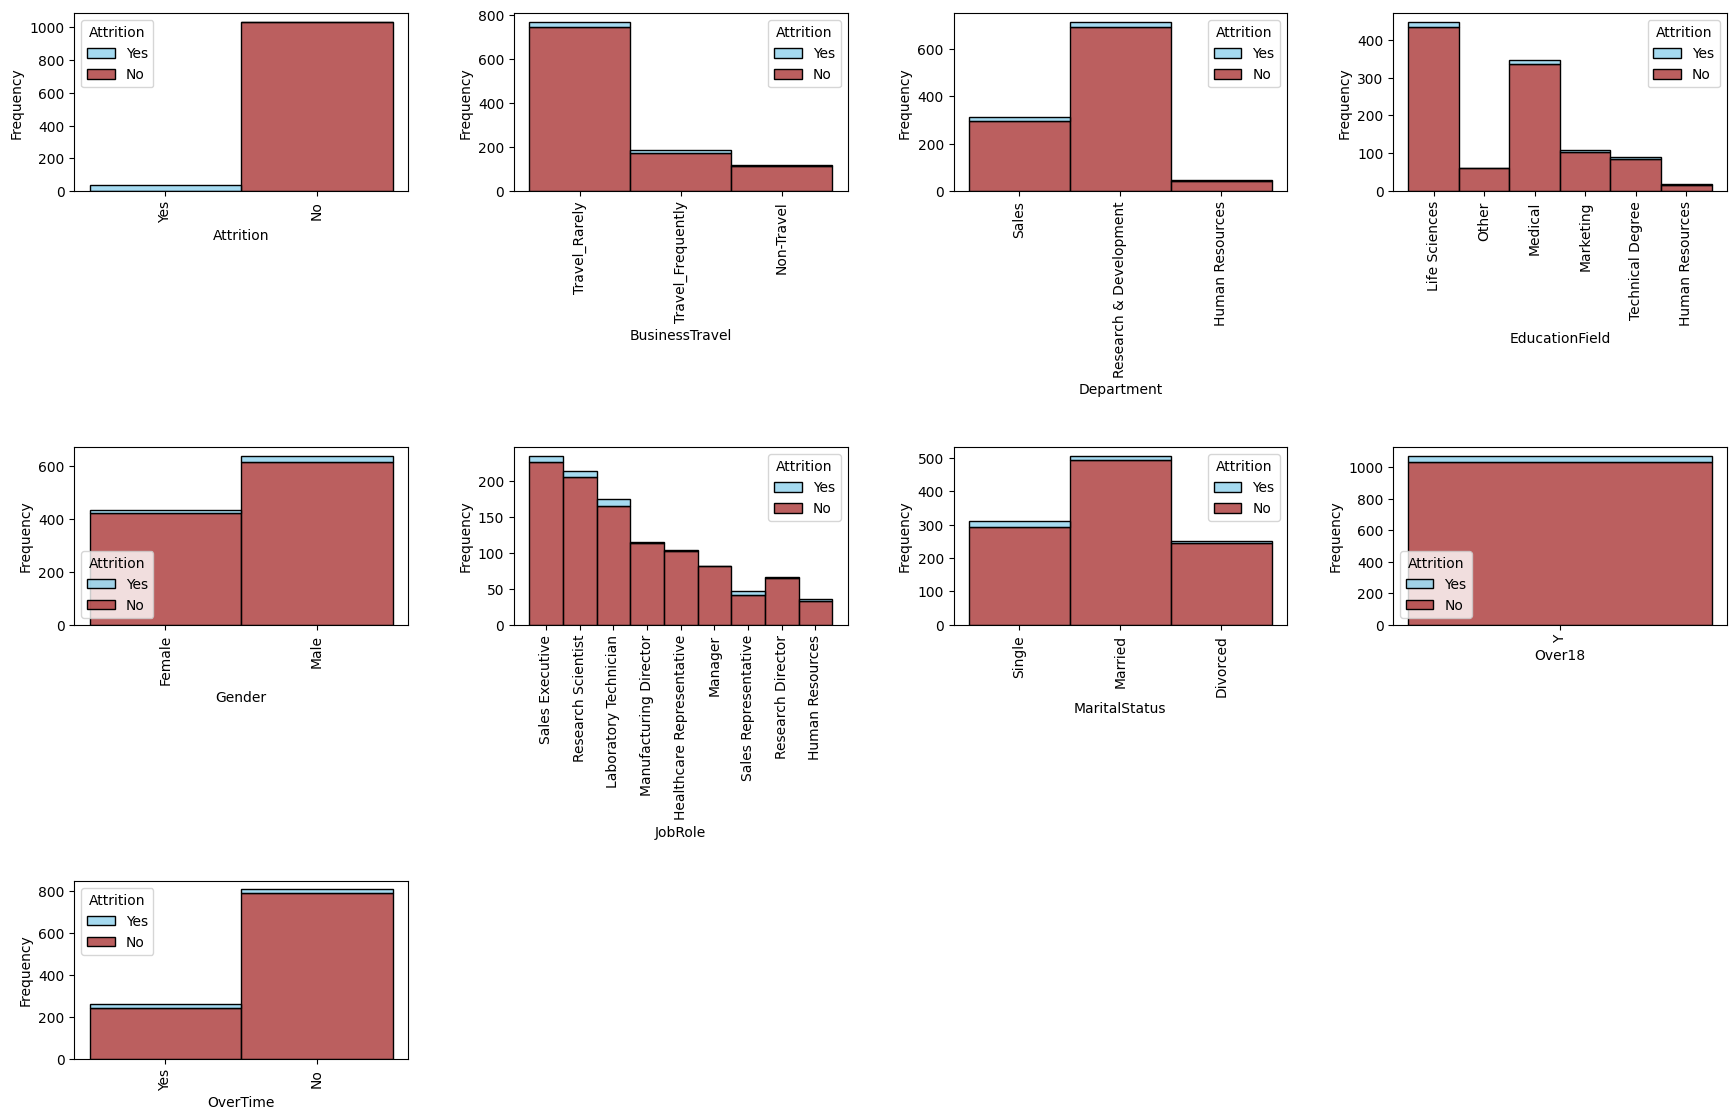

In [92]:
plt.figure(figsize=(18, 20))
# plotting histogram plot
for i, variable in enumerate(cat_cols):
    plt.subplot(5,4, i + 1)
    sns.histplot(Attrition_df,x=Attrition_df[variable], stat='frequency', hue='Attrition', multiple='stack', palette=['skyblue','brown'])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

plt.show()

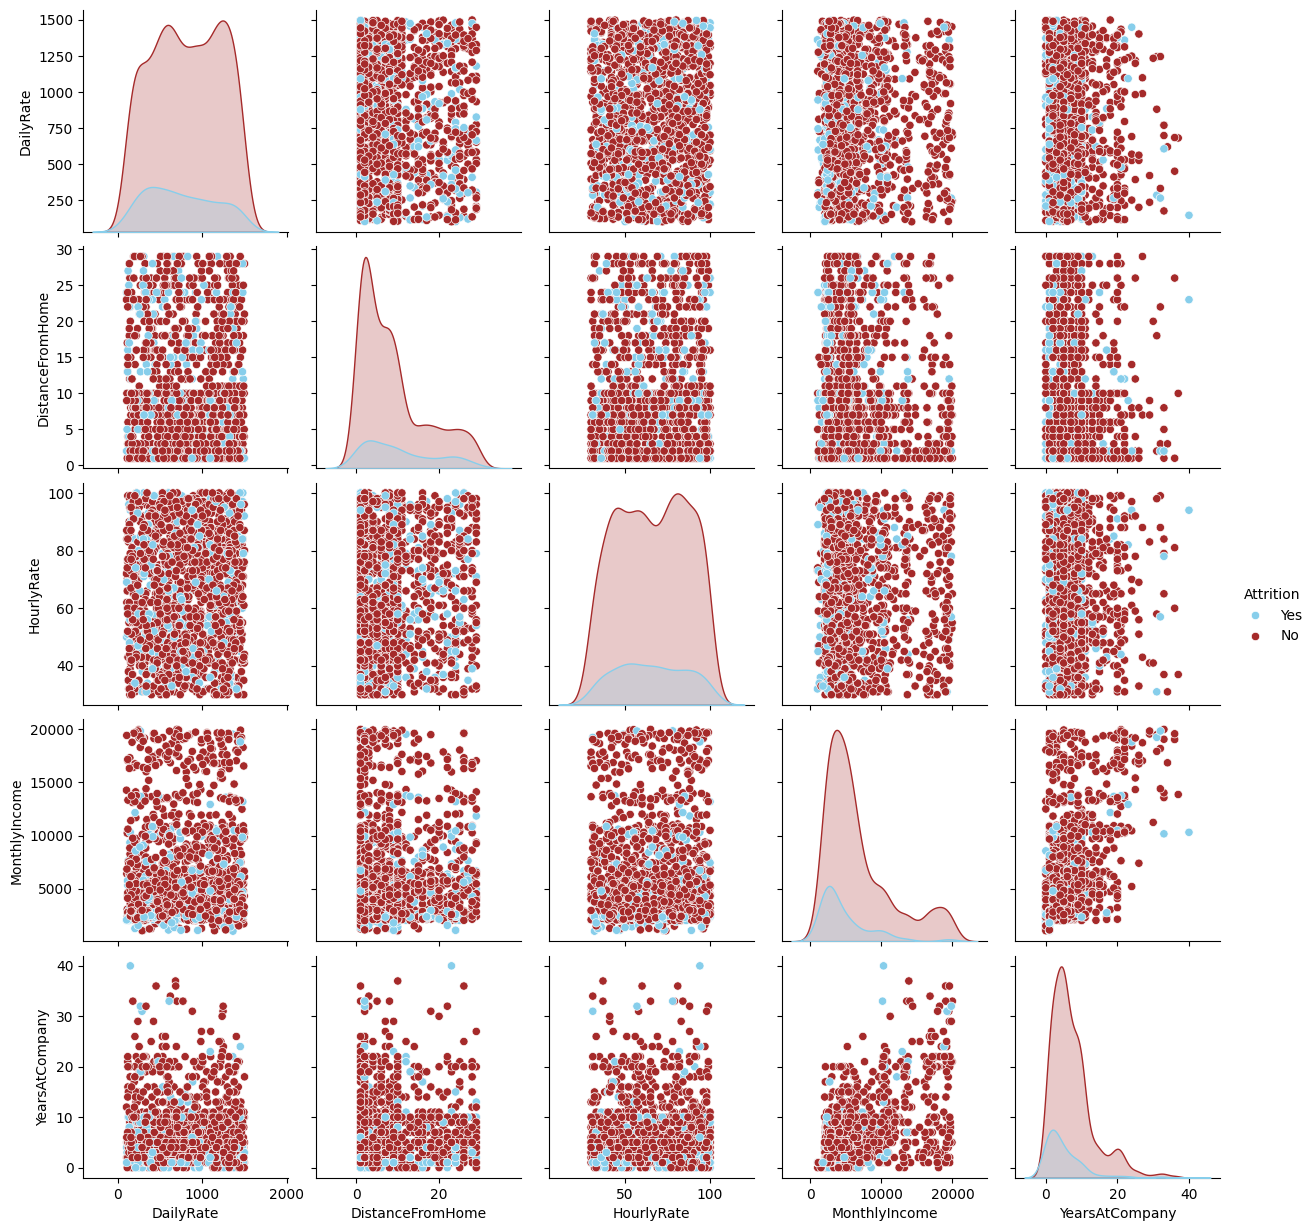

In [93]:
# Selecting numerical columns and Attrition for pairplot
sns.pairplot(Attrition_df, hue='Attrition', 
             vars=['DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'YearsAtCompany'],palette=['skyblue','brown'])
plt.show()


## OBSERVATION

- Age shows a strong positive correlation with total working years and monthly income, and total working years are also closely correlated with monthly income and job level.

- Divorced employees exhibit the lowest attrition rates compared to other marital statuses.

- Employees in roles such as Sales Executive, Research Scientist, Laboratory Technician, and Sales Representative demonstrate higher attrition rates compared to those in other job roles.

- Despite having the highest representation in terms of business travel, employees who travel rarely have a higher attrition rate than those in other travel categories.